In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import time
import matplotlib.pyplot as plt
import numpy as np
import superpixel_analysis as sup
import util_plot

from skimage import io

import scipy.io
from scipy.ndimage import center_of_mass

In [779]:
path = '../../../../../cohen_lab/Lab/Labmembers/Michael Xie/final simulations/data/noisy/trial1/B1-0.75/B2-0.75/A-0.50'

mov_nn = io.imread(path + '/denoised.tif')
noise = np.squeeze(io.imread(path + '/Sn_image.tif'))

mov = mov_nn.copy() * np.repeat(np.expand_dims(noise,2),mov_nn.shape[2],axis=2)

mov.shape

(128, 128, 1000)

## if input is whole data mov

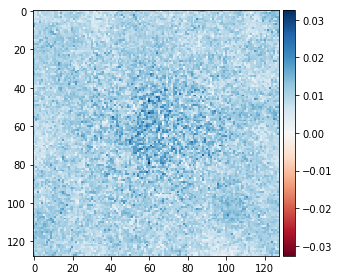

In [780]:
io.imshow(np.mean(mov,axis=2))

In [826]:
start = time.time()

rlt=sup.axon_pipeline_Y(mov.copy(), fb_ini=np.zeros(1), ff_ini=np.zeros(1),
                        cut_off_point = [0.995], length_cut = [50], 
                        bg = 1, patch_size=[100,100], residual_cut = [np.sqrt(1-(1)**2)], corr_th_fix=0.2,
                        merge_corr_thr=0.99,
                        sup_only = False, remove=1)

print("Demixing took: " + str(time.time()-start)+" sec")

start 1 pass!
find superpixels!
0.7131552696228027
rank 1 svd!
1.0329933166503906
find pure superpixels!
0.0028290748596191406
prepare iteration!
0.1237332820892334
0.8762450218200684
start 1 pass iteration!
a.shape = (16384, 3); c.shape = (1000, 3)
time: 0.18914461135864258
time: 0.1872868537902832
time: 0.18859505653381348


/n/home00/mxie/.conda/envs/michaelxie/lib/python3.6/site-packages/scipy/sparse/base.py:594: RuntimeWarning: invalid value encountered in true_divide
  return np.true_divide(self.todense(), other)
/n/home00/mxie/Projects/invivo/demixing/superpixel_analysis.py:2139: RuntimeWarning: invalid value encountered in greater
  cri = np.asarray((cor_corr/(temp.T)) > merge_overlap_thr)*np.asarray((cor_corr/temp) > merge_overlap_thr)*((a_corr>0).toarray());#.toarray())*(((cor_corr/(temp.T)) > merge_overlap_thr).toarray())*((a_corr > 0).toarray());


no merge!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
time: 0.406635046005249
time: 0.19197487831115723
time: 0.18766093254089355
time: 0.18860125541687012
no merge!
corr too low!
corr too low!
corr too low!
corr too low!
corr too low!
time: 0.3984091281890869
time: 0.18814826011657715
time: 0.18827366828918457
time: 0.18647003173828125
no merge!
corr too low!
corr too low!
corr too low!
corr too low!
time: 0.39560413360595703
time: 0.18794727325439453
time: 0.18804693222045898
time: 0.18658828735351562
no merge!
corr too low!
corr too low!
corr too low!
corr too low!
time: 0.3959798812866211
time: 0.18822169303894043
time: 0.18834996223449707
time: 0.18624210357666016
no merge!
corr too low!
corr too low!
corr too low!
corr too low!
time: 0.39589905738830566
time: 0.18788814544677734
time: 0.18830037117004395
time: 0.18641924858093262
no merge!
corr

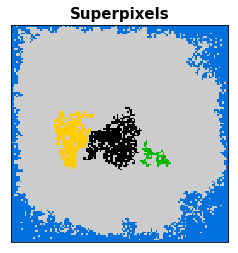

In [827]:
z = sup.superpixel_single_plot(rlt["superpixel_rlt"][0]["connect_mat_1"],
                           np.arange(np.amax(rlt["superpixel_rlt"][0]["connect_mat_1"])-1),
                           rlt["superpixel_rlt"][0]["brightness_rank"],
                           text=False)

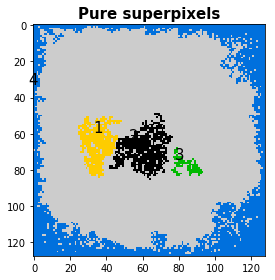

In [828]:
sup.pure_superpixel_single_plot(rlt["superpixel_rlt"][0]["connect_mat_1"],
                                rlt["superpixel_rlt"][0]["pure_pix"],
                                rlt["superpixel_rlt"][0]["brightness_rank"],text=True);

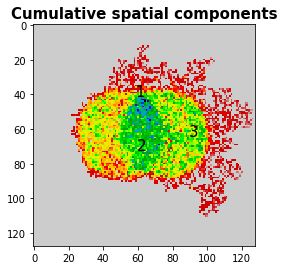

In [829]:
sup.spatial_sum_plot_single((rlt["fin_rlt"]["a"]),mov.shape[:2],text=True);

In [830]:
np.save(path + '/demixed.npy',rlt)

/n/home00/mxie/.conda/envs/michaelxie/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


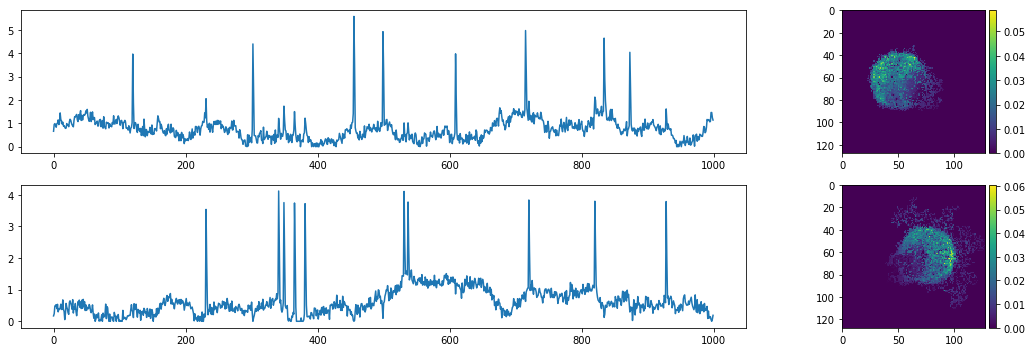

In [841]:
cell_num = 3
plt.figure(figsize=(18,5))
plt.subplot(2,2,1)
plt.plot(rlt["fin_rlt"]["c"][:,1-1])
plt.subplot(2,2,2)
io.imshow(rlt["fin_rlt"]["a"][:,1-1].reshape(mov.shape[1],mov.shape[0]).transpose(1,0))
plt.subplot(2,2,3)
plt.plot(rlt["fin_rlt"]["c"][:,cell_num-1])
plt.subplot(2,2,4)
io.imshow(rlt["fin_rlt"]["a"][:,cell_num-1].reshape(mov.shape[1],mov.shape[0]).transpose(1,0))

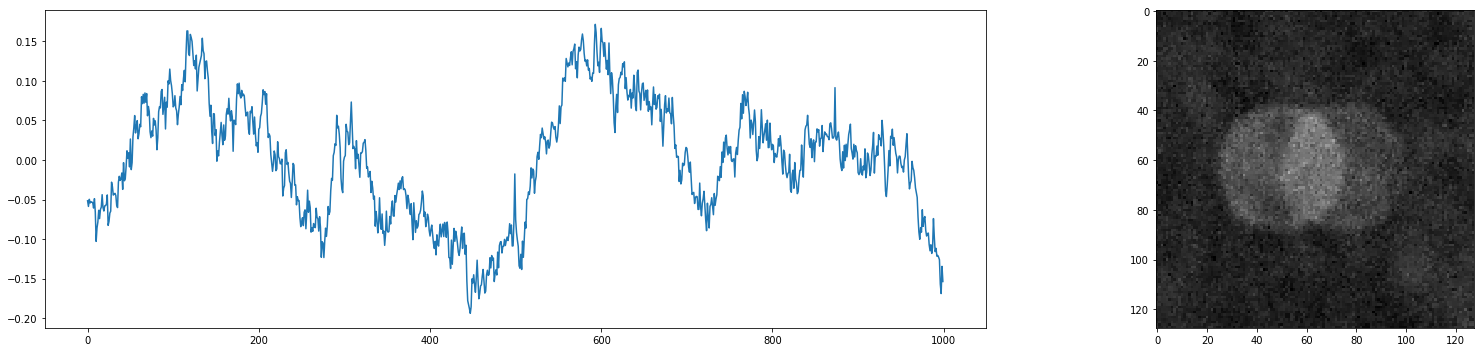

In [832]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.plot(rlt["fin_rlt"]["ff"][:,0])
plt.subplot(1,2,2)
io.imshow(rlt["fin_rlt"]["fb"][:,0].reshape(mov.shape[1::-1]).transpose(1,0))

# Postprocessing Regression Steps

In [842]:
Y = mov.transpose(1,0,2).reshape(mov.shape[0]*mov.shape[1],mov.shape[2])
X = np.hstack((rlt["fin_rlt"]["a"] * rlt["fin_rlt"]["c"][200,:],
               rlt["fin_rlt"]["fb"] * rlt["fin_rlt"]["ff"][200,:]))

In [843]:
nCells = 2

w = np.linalg.lstsq(np.hstack((X[:,:nCells],np.ones(X[:,:1].shape))), X[:,nCells:])[0]
w

/n/home00/mxie/.conda/envs/michaelxie/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[0.98311421],
       [0.66700459],
       [0.13443405],
       [0.00559278]])

In [844]:
X2 = X.copy()
X2[:,:nCells] = X[:,:nCells] + X[:,:nCells] * np.repeat(np.expand_dims(np.sum(w[:nCells,:],axis=1),axis=1).transpose(1,0),X.shape[0],axis=0)
X2[:,nCells:] = X[:,nCells:] - X[:,:nCells] @ w[:nCells,:]

# xb = X[:,:3] @ w[:3,:];
# cellxb = X[:,:3] * np.repeat(np.expand_dims(np.sum(w[:3,:],axis=1),axis=1).transpose(1,0),X.shape[0],axis=0)

/n/home00/mxie/.conda/envs/michaelxie/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


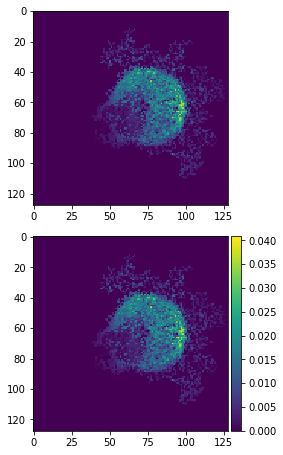

In [845]:
plt.figure(figsize=(10,25))
plt.subplot(8,2,1)
io.imshow(X[:,2].reshape(mov.shape[1::-1]).transpose(1,0))
# plt.subplot(8,2,2)
# io.imshow(X[:,3].reshape(mov.shape[1::-1]).transpose(1,0))

plt.subplot(8,2,3)
io.imshow(X2[:,2].reshape(mov.shape[1::-1]).transpose(1,0))
# plt.subplot(8,2,4)
# io.imshow(X2[:,3].reshape(mov.shape[1::-1]).transpose(1,0))

In [846]:
beta_hat2 = np.linalg.lstsq(X2, Y)[0]
res = np.mean(np.square(Y - X2 @ beta_hat2),axis = 0)

/n/home00/mxie/.conda/envs/michaelxie/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [847]:
signal2 = X2[:,:nCells] @ beta_hat2[:nCells,:15000]
background2 = X2[:,nCells:] @ beta_hat2[nCells:,:15000]

io.imsave(path + '/signal_15s.tif', signal2)
io.imsave(path + '/background_15s.tif', background2)

/n/home00/mxie/.conda/envs/michaelxie/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: ../../../../../cohen_lab/Lab/Labmembers/Michael Xie/final simulations/data/noisy/trial1/B1-0.75/B2-0.75/A-0.50/signal_15s.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/n/home00/mxie/.conda/envs/michaelxie/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: ../../../../../cohen_lab/Lab/Labmembers/Michael Xie/final simulations/data/noisy/trial1/B1-0.75/B2-0.75/A-0.50/background_15s.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


In [849]:
io.imsave(path + '/spatial_footprints.tif', X2)
io.imsave(path + '/cell_spatial_footprints.tif', X2[:,(0,2)])
io.imsave(path + '/temporal_traces.tif', beta_hat2)
io.imsave(path + '/cell_traces.tif', beta_hat2[(0,2),:])
io.imsave(path + '/residual_var.tif', res)
io.imsave(path + '/cell_locations.tif',np.vstack((center_of_mass(X2[:,0].reshape(mov.shape[1::-1]).transpose(1,0)),
                                                  center_of_mass(X2[:,2].reshape(mov.shape[1::-1]).transpose(1,0))
                                                 )
                                                ))
io.imsave(path + '/cell_demixing_matrix.tif', np.linalg.inv(np.array(X2[:,(0,1)].T @ X2[:,(0,1)])) @ X2[:,(0,1)].T)

/n/home00/mxie/.conda/envs/michaelxie/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: ../../../../../cohen_lab/Lab/Labmembers/Michael Xie/final simulations/data/noisy/trial1/B1-0.75/B2-0.75/A-0.50/spatial_footprints.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/n/home00/mxie/.conda/envs/michaelxie/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: ../../../../../cohen_lab/Lab/Labmembers/Michael Xie/final simulations/data/noisy/trial1/B1-0.75/B2-0.75/A-0.50/cell_spatial_footprints.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/n/home00/mxie/.conda/envs/michaelxie/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: ../../../../../cohen_lab/Lab/Labmembers/Michael Xie/final simulations/data/noisy/trial1/B1-0.75/B2-0.75/A-0.50/residual_var.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/n/home00/mxie/.conda/envs/michaelxie/lib/python3.6/site-packages/skimage/io/_io.py:14

# Visualizations

/n/home00/mxie/.conda/envs/michaelxie/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


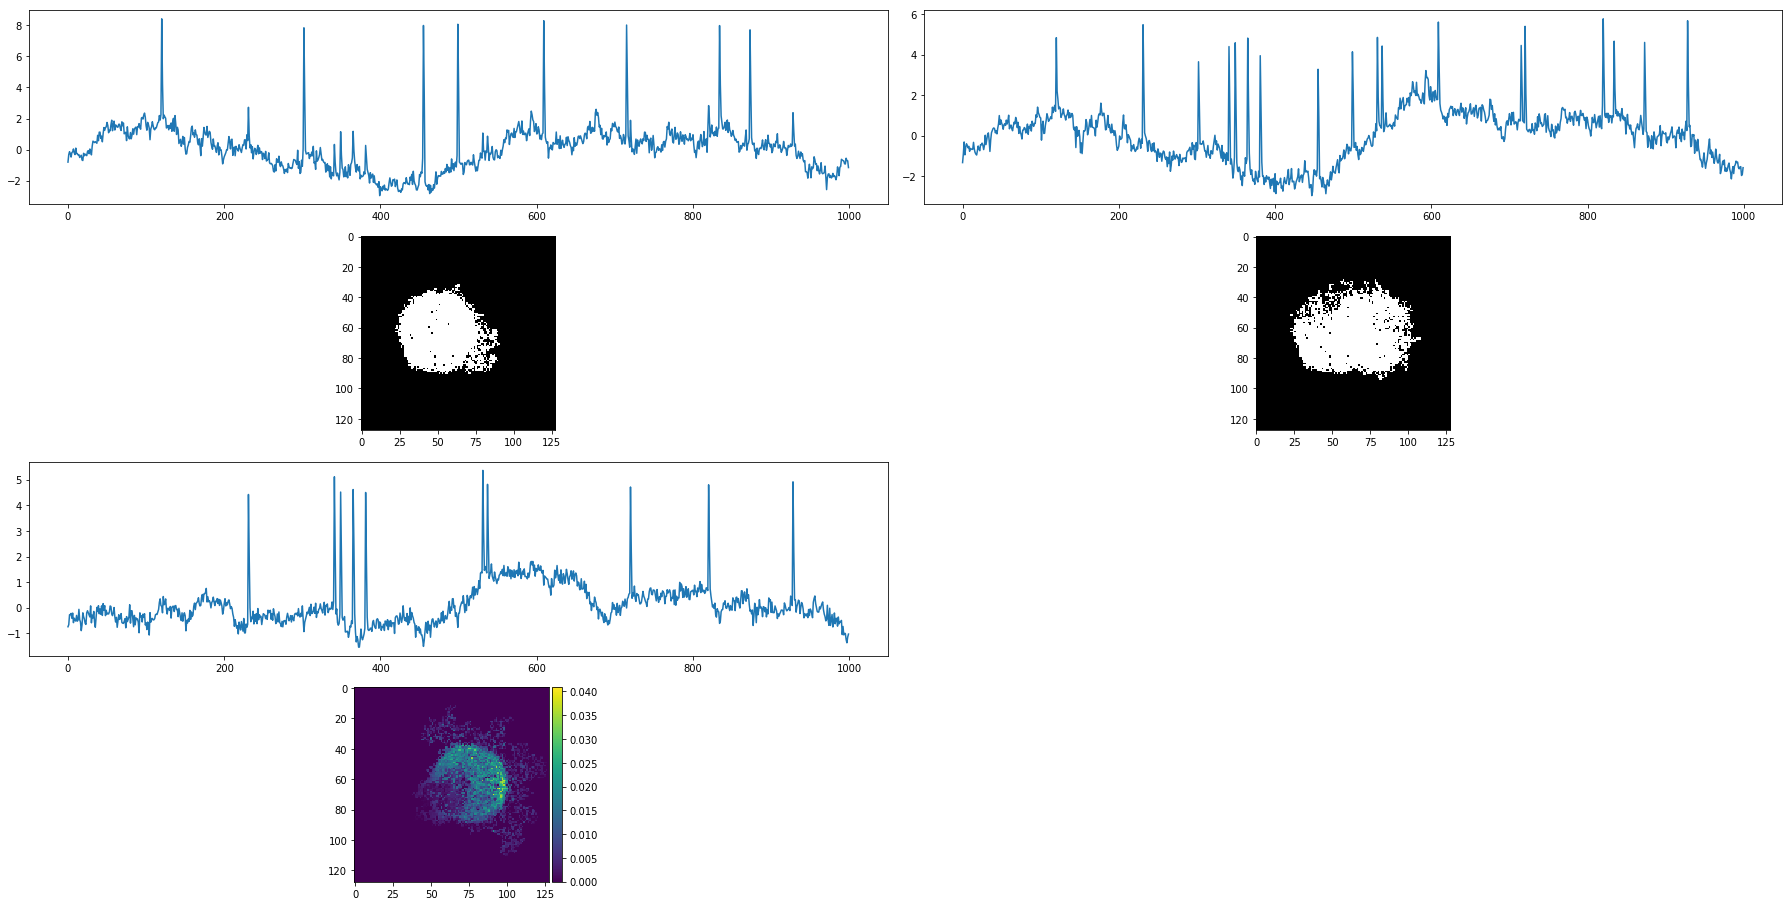

In [848]:
plt.figure(figsize=(25,25))

plt.subplot(8,2,1)
plt.plot(beta_hat2[0,:])
plt.subplot(8,2,2)
plt.plot(beta_hat2[1,:])

plt.subplot(8,2,3)
io.imshow(X2[:,0].reshape(mov.shape[1::-1]).transpose(1,0)>0)
plt.subplot(8,2,4)
io.imshow(X2[:,1].reshape(mov.shape[1::-1]).transpose(1,0)>0)


plt.subplot(8,2,5)
plt.plot(beta_hat2[2,:])

plt.subplot(8,2,7)
io.imshow(X2[:,2].reshape(mov.shape[1::-1]).transpose(1,0))